In [114]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [115]:
# Load data set from .csv
data = pd.read_csv('AppleStore.csv')
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [116]:
# Separate numeric and categorical columns

numeric_cols = [
    'size_bytes',
    'price',
    'rating_count_tot',
    'rating_count_ver',
    'sup_devices.num',
    'ipadSc_urls.num',
    'lang.num',
    'cont_rating'
]

categorical_cols= [
    'currency',
    'prime_genre'
]

target_col = 'user_rating'

cols = numeric_cols + categorical_cols + [target_col]

In [117]:
# Take only needed columns, handle data

data = data[cols]
data['cont_rating'] = data['cont_rating'].str.slice(0, -1).astype(int)
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,currency,prime_genre,user_rating
0,100788224,3.99,21292,26,38,5,10,4,USD,Games,4.0
1,158578688,0.00,161065,26,37,5,23,4,USD,Productivity,4.0
2,100524032,0.00,188583,2822,37,5,3,4,USD,Weather,3.5
3,128512000,0.00,262241,649,37,5,9,12,USD,Shopping,4.0
4,92774400,0.00,985920,5320,37,5,45,4,USD,Reference,4.5


In [118]:
# Check for NaN values

data.isna().sum()

size_bytes          0
price               0
rating_count_tot    0
rating_count_ver    0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
cont_rating         0
currency            0
prime_genre         0
user_rating         0
dtype: int64

In [119]:
# Check distribution of categorical values

for col in categorical_cols:
    print(f'{col} DISTRIBUTION:')
    print(data[col].value_counts())
    print()

currency DISTRIBUTION:
USD    7197
Name: currency, dtype: int64

prime_genre DISTRIBUTION:
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64



In [120]:
# Drop useless data: coluumn 'currency'

data.drop(columns=['currency'])
categorical_cols.remove('currency')

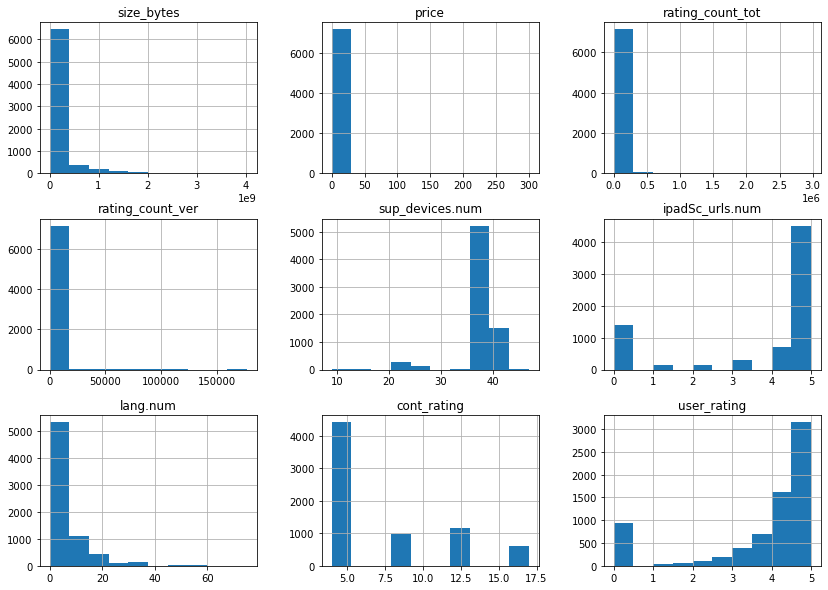

In [121]:
# Check values distribution

data.hist(column=numeric_cols + categorical_cols + [target_col], figsize=(14, 10))
None  # Not to show axis list

In [122]:
# Check correlation between features

data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,user_rating
size_bytes,1.00,0.18,0.00,0.01,-0.12,0.15,0.00,0.14,0.07
price,0.18,1.00,-0.04,-0.02,-0.12,0.07,-0.01,-0.03,0.05
rating_count_tot,0.00,-0.04,1.00,0.16,0.01,0.02,0.14,0.01,0.08
rating_count_ver,0.01,-0.02,0.16,1.00,0.04,0.02,0.01,0.00,0.07
sup_devices.num,-0.12,-0.12,0.01,0.04,1.00,-0.04,-0.04,0.02,-0.04
ipadSc_urls.num,0.15,0.07,0.02,0.02,-0.04,1.00,0.09,-0.11,0.27
lang.num,0.00,-0.01,0.14,0.01,-0.04,0.09,1.00,-0.07,0.17
cont_rating,0.14,-0.03,0.01,0.00,0.02,-0.11,-0.07,1.00,-0.10
user_rating,0.07,0.05,0.08,0.07,-0.04,0.27,0.17,-0.10,1.00


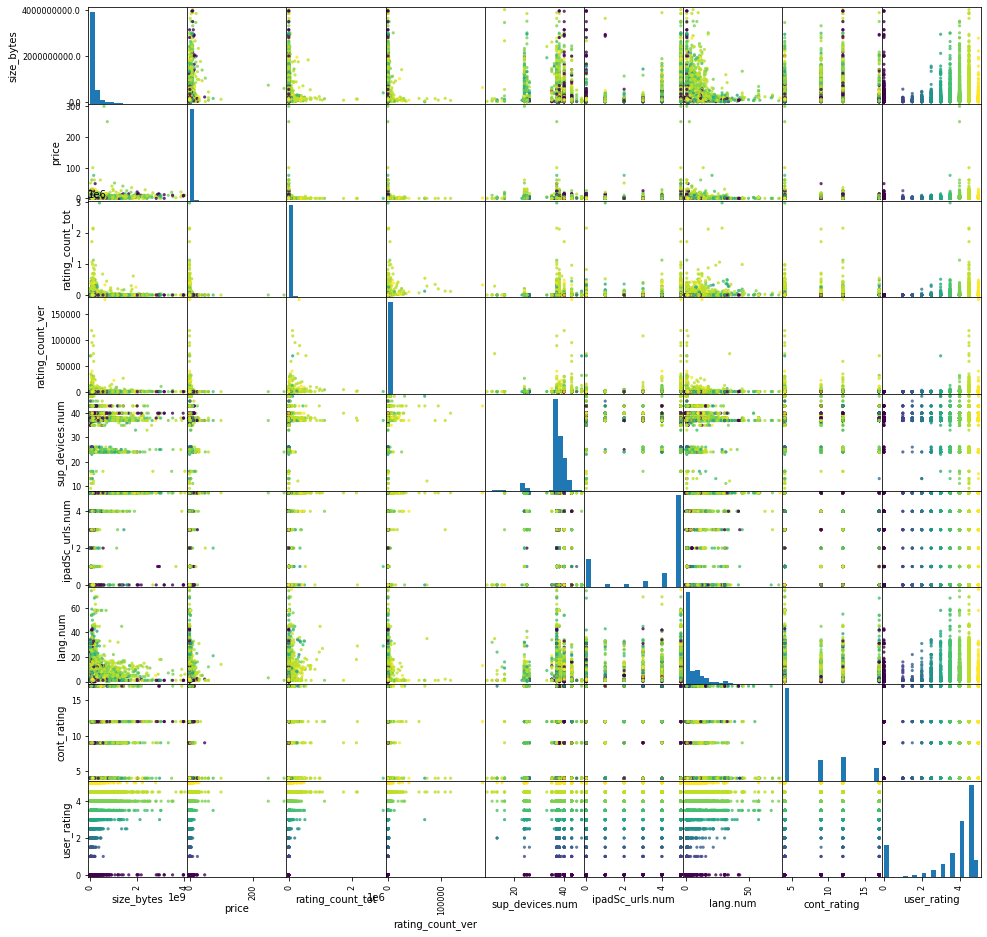

In [123]:
pd.plotting.scatter_matrix(data, c=data[target_col], figsize=(16, 16), marker='o', hist_kwds={'bins': 20}, s=10, alpha=0.8)
None

In [124]:
# Add catedorial feature that tells whether the app is free or not

data['is_free'] = data['price'] == 0
categorical_cols.append('is_free')
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,currency,prime_genre,user_rating,is_free
0,100788224,3.99,21292,26,38,5,10,4,USD,Games,4.0,False
1,158578688,0.00,161065,26,37,5,23,4,USD,Productivity,4.0,True
2,100524032,0.00,188583,2822,37,5,3,4,USD,Weather,3.5,True
3,128512000,0.00,262241,649,37,5,9,12,USD,Shopping,4.0,True
4,92774400,0.00,985920,5320,37,5,45,4,USD,Reference,4.5,True


In [125]:
# Usign one-hot-encoding to handle categorical data

a = pd.DataFrame.from_dict({'categorical': ['a', 'b', 'a', 'c']})
a


,categorical
0,a
1,b
2,a
3,c


In [126]:
# Make permutations with get_dummies method

pd.get_dummies(a)

,categorical_a,categorical_b,categorical_c
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,1


In [127]:
# Add all categorical features and update categorical list

data = pd.get_dummies(data, columns=categorical_cols)
data

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,currency,user_rating,...,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather,is_free_False,is_free_True
0,100788224,3.99,21292,26,38,5,10,4,USD,4.0,...,0,0,0,0,0,0,0,0,1,0
1,158578688,0.00,161065,26,37,5,23,4,USD,4.0,...,1,0,0,0,0,0,0,0,0,1
2,100524032,0.00,188583,2822,37,5,3,4,USD,3.5,...,0,0,0,0,0,0,0,1,0,1
3,128512000,0.00,262241,649,37,5,9,12,USD,4.0,...,0,0,1,0,0,0,0,0,0,1
4,92774400,0.00,985920,5320,37,5,45,4,USD,4.5,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,126644224,0.00,142,75,38,5,1,4,USD,4.5,...,0,0,0,0,0,0,0,0,0,1
7193,120760320,0.00,30,30,38,0,1,4,USD,4.5,...,0,0,0,0,0,0,0,0,0,1
7194,111322112,1.99,15,0,37,1,1,9,USD,4.5,...,0,0,0,0,0,0,1,0,1,0
7195,97235968,0.00,85,32,38,0,2,12,USD,4.5,...,0,0,0,0,0,0,0,0,0,1


In [129]:
cat_cols_new = []
for col_name in categorical_cols:
    cat_cols_new.extend(filter(lambda x: x.startswith(col_name), data.columns))
categorical_cols = cat_cols_new
categorical_cols

['prime_genre_Book',
 'prime_genre_Business',
 'prime_genre_Catalogs',
 'prime_genre_Education',
 'prime_genre_Entertainment',
 'prime_genre_Finance',
 'prime_genre_Food & Drink',
 'prime_genre_Games',
 'prime_genre_Health & Fitness',
 'prime_genre_Lifestyle',
 'prime_genre_Medical',
 'prime_genre_Music',
 'prime_genre_Navigation',
 'prime_genre_News',
 'prime_genre_Photo & Video',
 'prime_genre_Productivity',
 'prime_genre_Reference',
 'prime_genre_Shopping',
 'prime_genre_Social Networking',
 'prime_genre_Sports',
 'prime_genre_Travel',
 'prime_genre_Utilities',
 'prime_genre_Weather',
 'is_free_False',
 'is_free_True']

In [130]:
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,currency,user_rating,...,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather,is_free_False,is_free_True
0,100788224,3.99,21292,26,38,5,10,4,USD,4.0,...,0,0,0,0,0,0,0,0,1,0
1,158578688,0.00,161065,26,37,5,23,4,USD,4.0,...,1,0,0,0,0,0,0,0,0,1
2,100524032,0.00,188583,2822,37,5,3,4,USD,3.5,...,0,0,0,0,0,0,0,1,0,1
3,128512000,0.00,262241,649,37,5,9,12,USD,4.0,...,0,0,1,0,0,0,0,0,0,1
4,92774400,0.00,985920,5320,37,5,45,4,USD,4.5,...,0,1,0,0,0,0,0,0,0,1


In [139]:
from sklearn.preprocessing import StandardScaler


# Train scaler with data
pca = StandardScaler()
pca.fit(data[numeric_cols + categorical_cols])

# Transform data
X = pca.transform(data[numeric_cols + categorical_cols])

#The easier way
X = pca.fit_transform(data[numeric_cols + categorical_cols])

In [161]:
# Divide data for train/test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, data[target_col], test_size=0.2)

In [146]:
# Learning

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [147]:
def print_metrics(y_preds, y):
    print(f'R^2: {r2_score(y_preds, y)}')
    print(f'MSE: {mean_squared_error(y_preds, y)}')

In [150]:
# Teach linear regression, minimizing square erros sum
lr = LinearRegression()
lr.fit(X_train, y_train)

print_metrics(lr.predict(X_test), y_test)

R^2: -4.2733119786009635
MSE: 2.11960377505819


In [152]:
# Teach KNN linear regression, minimizing square erros sum

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

print_metrics(knn.predict(X_test), y_test)


R^2: -0.9539563947590601
MSE: 2.0027291666666667


In [154]:
# Cross Validation

from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate

In [155]:
cross_validate(LinearRegression(), X, data[target_col], cv=5,
              scoring={'r2_score': make_scorer(r2_score),
                      'mean_squared_error': make_scorer(mean_squared_error)})

{'fit_time': array([0.00500202, 0.00600004, 0.00600195, 0.00600147, 0.006001  ]),
 'score_time': array([0.00099921, 0.        , 0.        , 0.0010004 , 0.0010004 ]),
 'test_r2_score': array([-0.83213056,  0.06669609,  0.11580544,  0.10979922,  0.07103069]),
 'test_mean_squared_error': array([1.66719287, 1.48681837, 1.94025705, 2.81793773, 2.93213489])}

In [156]:
cross_validate(KNeighborsRegressor(), X, data[target_col], cv=5,
              scoring={'r2_score': make_scorer(r2_score),
                      'mean_squared_error': make_scorer(mean_squared_error)})

{'fit_time': array([0.00199986, 0.00200009, 0.00200129, 0.00200057, 0.00100017]),
 'score_time': array([0.17603922, 0.16303635, 0.1580348 , 0.15503526, 0.15003443]),
 'test_r2_score': array([-0.59746466, -0.00837802,  0.0274914 ,  0.19082863,  0.0752518 ]),
 'test_mean_squared_error': array([1.45365278, 1.60641667, 2.13405142, 2.5614385 , 2.91881167])}

In [159]:
# Search hyperparams

from sklearn.model_selection import GridSearchCV

In [170]:
gbr_grid_search = GridSearchCV(KNeighborsRegressor(),
                              [{'n_neighbors' : [1, 2, 3, 4, 6, 8, 10, 15]}],
                              cv=5,
                              scoring=make_scorer(mean_squared_error),
                              # error_score='raise',
                              verbose=10)
gbr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START n_neighbors=1...............................................
[CV 1/5; 1/8] END .............................n_neighbors=1; total time=   0.0s
[CV 2/5; 1/8] START n_neighbors=1...............................................
[CV 2/5; 1/8] END .............................n_neighbors=1; total time=   0.0s
[CV 3/5; 1/8] START n_neighbors=1...............................................
[CV 3/5; 1/8] END .............................n_neighbors=1; total time=   0.0s
[CV 4/5; 1/8] START n_neighbors=1...............................................
[CV 4/5; 1/8] END .............................n_neighbors=1; total time=   0.0s
[CV 5/5; 1/8] START n_neighbors=1...............................................
[CV 5/5; 1/8] END .............................n_neighbors=1; total time=   0.0s
[CV 1/5; 2/8] START n_neighbors=2...............................................
[CV 1/5; 2/8] END .............................n_

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 6, 8, 10, 15]}],
             scoring=make_scorer(mean_squared_error), verbose=10)

In [175]:
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)
print_metrics(gbr_grid_search.best_estimator_.predict(X_test), y_test)

{'n_neighbors': 1}
3.2779375120668015
R^2: -0.22940613347436356
MSE: 2.8340277777777776


In [177]:
# KFold

from sklearn.model_selection import KFold


In [178]:
kf = KFold(n_splits=5)

In [179]:
model = KNeighborsRegressor()

In [181]:
metrics = []
for train_ind, test_ind in kf.split(X_train):
    model.fit(X_train[train_ind], y_train.values[train_ind])
    pred = model.predict(X_train[test_ind])
    metrics.append(mean_squared_error(y_train.values[test_ind], pred))

In [182]:
metrics

[2.0120659722222225,
 2.137734375,
 2.003953084274544,
 1.9728583840139011,
 1.9941615986099046]